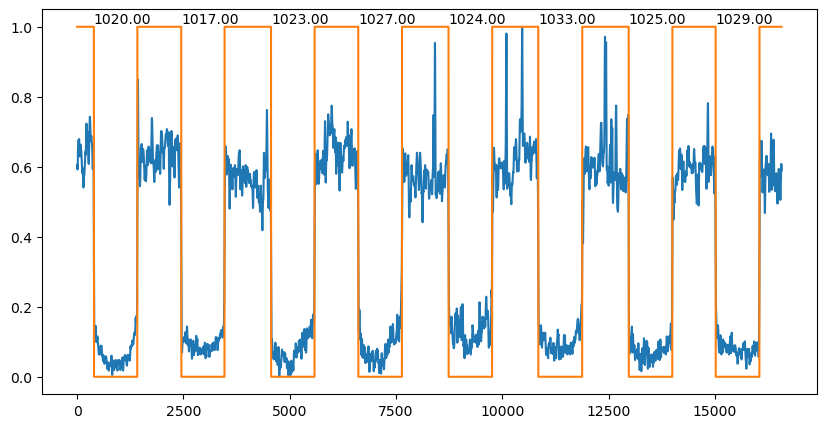

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

select_column = 'CASE1'
csv_raw = pd.read_csv("./data/data_laser.csv")
selected_data = csv_raw.loc[:,[select_column]]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(selected_data)
selected_data['scaled'] = normalized_data

# k-means clustering
k = 2
model = KMeans(n_clusters = k, n_init='auto')
selected_data['cluster'] =  model.fit_predict(normalized_data)

# cluster alignment
_cluster_indices = selected_data.groupby('cluster').groups
index_lists = [list(indices) for indices in _cluster_indices.values()]
if selected_data.loc[index_lists[0][0], select_column] > selected_data[select_column].mean():
    selected_data.loc[index_lists[0],'cluster'] = 1
    selected_data.loc[index_lists[1],'cluster'] = 0
    
# calc diff
selected_data['diff'] = selected_data['cluster'].diff()
    

# draw
plt.figure(figsize=(10,5))
plt.plot(selected_data.loc[:,['scaled', 'cluster']])


for idx, diff_v in enumerate(selected_data['diff']):
    if diff_v<0: # falling edge
        falling_index = idx
    elif diff_v>0: # rising edge
        rising_index = idx
        plt.annotate(f"{rising_index-falling_index:.2f}", xy=(falling_index, 1.01), fontsize=10)
        
        

